# Thompson Sampling

I will be experimenting with the Multi-armed bandit problem with the Thompson Sampling algorithm described in chapter 36 in the textbook.

## Setup

Suppose that we have $k$ arms, each with a random bernoulli reward at time $t$. The following code should be implemented to capture this setup.

# Import Dependencies

In [ ]:
import numpy as np
import pickle

# Reward function
Implement the reward function described in the setup. Specifically, given a $k$- dimensional vector 'avg' representing the true means, return a $k$- dimensional vector 'rew' such that $rew[i] = 1$ if $avg[i] > np.random.random()$ and $0$ otherwise.

In [ ]:
def get_reward(avg):

    ## Your Code here
    rew = np.zeros(len(avg))

    for i in range(len(avg)):
      if avg[i] > np.random.random():
        rew[i] = 1
      else:
        rew[i] = 0
  
    return rew

## Algorithm review


Recall that the beta distribution is the conjugate prior probability distribution for the Bernoulli. Hence, in the algorithm we need to update the shape parameters alpha and beta. Check Algorithm 1 in: https://arxiv.org/pdf/1209.3353.pdf for more details. The algorithm is as follows:

1. Choose the arm with the maximum sample from the beta distribution with parameters alpha and beta.
3. Update these parameters and repeat.

## Goals

1. Basic Thompson Sampling algorithm implementation
2. Plot the expected cumulative regret of the Thompson Sampling algorithm as a function of time.
3. The cumulative regret is expected to be logarithmic against the horizon. To check that this is case, plot the logarithm of the expected cumulative regret of the Thompson Sampling algorithm. (Hint: use the semilogx function in matplotlib.pyplot) 

## Thompson Sampling

Implement Thompson Sampling algorithm using the skeleton below. The initialization part is done. Fill out the rest of the skeleton.

In [ ]:
class TS():    
    import numpy as np

    def __init__(self, avg):## Initialization
        self.means = avg
        self.num_arms = avg.size       
        self.best_arm = np.argmax(self.means)
        self.restart()

        return None
        ## variable names (most are self explanatory)
        ## self.means[arm] is the vector of true means of the arms
        ## self.num_arms is the number of arms (k)
        ## self.best_arm is the best arm given the true mean rewards
        ## self.alpha is the vector of alpha values that parameterize the beta distribution vector
        ## self.beta is the vector of beta values that parameterizes the beta distribution vector
        ## self.cum_reg is the cumulative regret
        
    def restart(self): ## Restart the algorithm: Reset the values of self.alpha and self.beta to ones (done). 
                       ## Reset the cumulative regret vector to zero.
        self.alpha = np.ones(self.num_arms)
        self.beta = np.ones(self.num_arms) 
        
        ## Your Code here
        self.cum_reg = [0]

        return None
    
    def get_best_arm(self): ## For each time index, find the best arm according to Thompson Sampling
        ## Your Code here

        best_arm = np.argmax(np.random.beta(self.alpha, self.beta))
        return best_arm
    
    def update(self, arm, rew): ## Update the alpha and beta vectors
        
        ## Your Code here

        if rew == 1:
          self.alpha[arm] += 1
        else:
          self.beta[arm] += 1

        return None
    
    
    def update_reg(self, arm, rew_vec): ## Update the cumulative regret vector
        
        ## Your Code here
        self.cum_reg.append(self.cum_reg[-1] + (rew_vec[self.best_arm] - rew_vec[arm]))

        return None
    
    def iterate(self, rew_vec):  ## Iterate the algorithm
        
        ## Your Code here

        arm = self.get_best_arm()
        rew = rew_vec[arm]
        self.update(arm, rew)
        self.update_reg(arm, rew_vec)

        return None

# Experiment Function

The following code runs the Thompson Sampling algorithm for multiple instances. In the code below, num_inst is the number of instances, and num_iter is the time at which we stop.

In [ ]:
def run_algo(avg, num_iter, num_inst):
    
    reg = np.zeros((num_inst, num_iter))
    
    algo = TS(avg)
    
    
    for k in range(num_inst):
        algo.restart()
        
        if (k+1)%10 == 0:
            print('Instance number = ', k+1)
        
        for t in range(num_iter-1):
            rew_vec = get_reward(avg)
            
            algo.iterate(rew_vec)
            
        reg[k,:] = np.asarray(algo.cum_reg)
        
    return reg

# Initializations
Use the following to initialize your algorithm. (This vector contains the actual mean rewards).

In [ ]:
avg = np.asarray([0.30, 0.25, 0.20, 0.15, 0.10])
num_iter,num_inst = int(1e4), 200 # << K might handle the fluctuation  << Law of Large Number 

# Run Experiment




In [ ]:
reg = run_algo(avg, num_iter, num_inst)

Instance number =  10
Instance number =  20
Instance number =  30
Instance number =  40
Instance number =  50
Instance number =  60
Instance number =  70
Instance number =  80
Instance number =  90
Instance number =  100
Instance number =  110
Instance number =  120
Instance number =  130
Instance number =  140
Instance number =  150
Instance number =  160
Instance number =  170
Instance number =  180
Instance number =  190
Instance number =  200


## Plotting the Results

1 - Compute the average regret over the number of instances and plot it against the number of iterations. Label the x-axis as time, and the y-axis as Cumulative Regret. Add a caption labeling this as 'Cumulative Regret with Thompson Sampling'.

2 - Use the semilogx function in matplotlib to check that the regret is logarithmic against horizon.

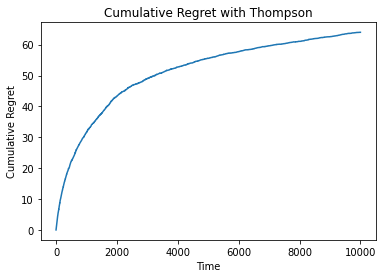

In [ ]:
## Your Code here

## Your Code here
import matplotlib.pyplot as plt

reg_lst = [reg_sublst[-1] for reg_sublst in reg]
avgreg_lst = np.mean(reg, 0)

plt.plot(avgreg_lst)
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with Thompson')
plt.show()

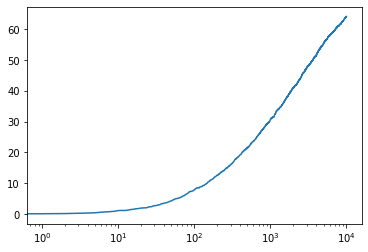

In [ ]:
plt.semilogx(avgreg_lst)
plt.show()